# Lab 1, Maria

## A little Statistics
### 1: Converting a probability into a 'sigma'. 
As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and standard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.

### Part A- background info

The Normal distribution, aka Gaussian, has the following functional form:

$$ h(x) = p(x \mid \mu,\sigma) = N(x|\mu,\sigma) \equiv \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

In plain English, this is the probability of x given $(\mu, \sigma)$. 

Features of a Normal Distribution include:
* looks like a bell (bell curve)
* mean = median = mode
* symmetry about the center, implying 50% of values less than the mean, and 50% greater than the mean
* area under the curve

The Gaussian looks like a bell curve:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm

In [2]:
mu=5
sigma=3
def example_gauss():
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    gauss = norm(mu, sigma).pdf(x)
    # actual plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axvline(mu, c='blue')
    ax.errorbar(mu, gauss.max() / 2., xerr=np.sqrt(2.*np.log(2.))*sigma, c='blue', capsize=4)
    plt.plot(x, gauss, ls='-', c='black', label=r'$\mu=%.1f,\ \sigma=%.1f$' % (mu, sigma))
    plt.ylim(0, gauss.max()*1.2)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Gaussian Distribution')
    plt.legend()
    plt.show()

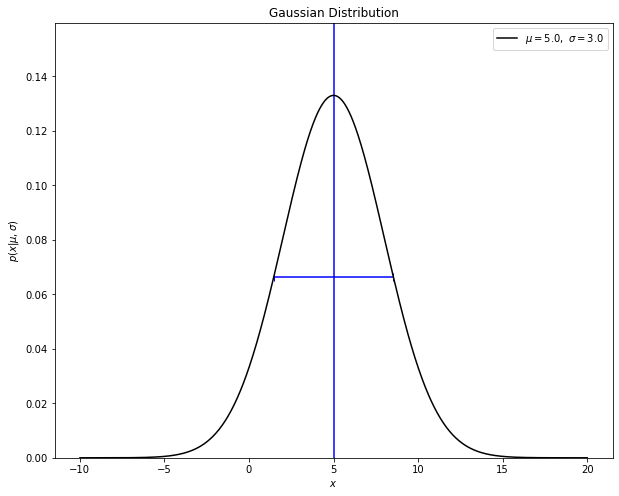

In [3]:
example_gauss()

As you can see, the mean, median and mode are at the same point (the peak), and there is symmetry to the graph. 

### Part B- Integration
The area under the normal curve is the probability of a certain event x at a given mu and sigma. The area under the curve is the integral of that function. 

Integrating the standard normal distribution is called the cumulative distribution function: 

$$\Phi(x') = \int_{-\infty}^{x'}  h(x)\,dx $$
$$\Phi(\infty) = 1.$$

and gives the probability that x will take a value less than x' (aka $x < x'$). It looks like this:

In [4]:
mu=5
sigma=3
h = norm(mu, sigma)
gauss_cdf = norm(mu, sigma).cdf

def plot_gauss_cdf():
    fig, ax = plt.subplots(figsize=(10, 8))
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    y = gauss_cdf(x)
    plt.plot(x, y, ls='-', c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
    plt.ylim(0, 1)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Cumulative Distribution Function for a Normal Distribution')
    plt.legend()
    plt.show()

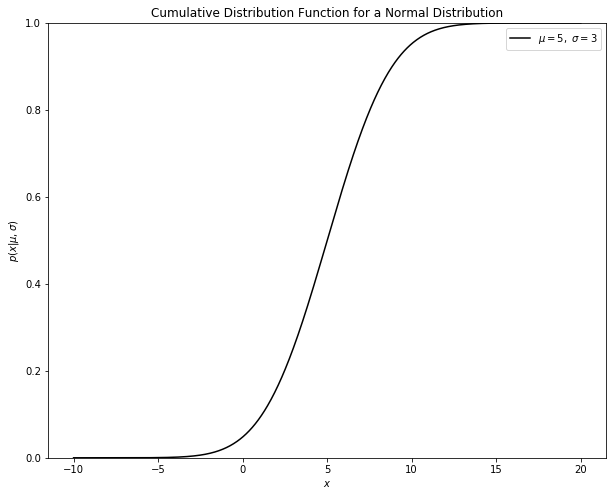

In [5]:
plot_gauss_cdf()

One useful tool realted to this is a z-table. A z-table is a mathematical table with values that correspond to the probability of an event. Essentially, the table relates a measurement (in units of $\sigma$) to probability.

To demonstrate this, let's integrate:

In [6]:
mu=5
sigma=3
h = norm(mu, sigma)

sigmas = np.array([0,1,2,3,4,5])
cdfval = np.empty(sigmas)

for i in sigmas:
    val = h.cdf(i)
    cdfval = np.append(cdfval, val)
print(cdfval)

[0.04779035 0.09121122 0.15865525 0.25249254 0.36944134 0.5       ]


In the above code block, I took $\sigma$'s from 0 to 5, and integrated the function from zero, up to that sigma. What I get in return is the probability of an event x falling in that range. Looking at this z-table: https://en.wikipedia.org/wiki/Standard_normal_table the values line up, as expected.

### Part C- Throw it in reverse
The integrating is cool and all, but usually, a probability is known, and we want to know the $\sigma$ associated with that event. To demonstrate this clearly, I will use the probabilities associated with 1,2, and 5 $\sigma$:

In [7]:
#ppf times here [IMPLEMENT]

Recall that the cdf is an integral from negative infinity to $\sigma$, but when we are looking for an X$\sigma$ event, we want the integral *from*  $\sigma$ to positive infinity. If done the other way, a minus sign appears.

### 2: Now let's explore some other continuous analytic distributions. 
Following the pattern from your first HW assigment, I made both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time not the Gaussian. This time, I am using a Rayleigh distribution.

### Part A- background
Rayleigh distribution has:::
Read up on your distribution

**B**
Make plots (tweaking distribution and plot parameters as needed)

### 3:
Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'

**A**
Select a value for your hypothetical measurement

**B**
Clearly state the statistical question you want to ask in words

**C**
Convert your word question into a mathematical integral

**D**
Use the math to calculate the probability that the background produced the signal (Hint: you will want to use the statistics functions to do the integrals. cdf() and icdf() in MatLab; .cdf() and .ppf() in scipy).

**E**
Convert your probability into an equivalent 'sigma'

### 4:
Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see.

In [8]:
# Rayleigh dist is mine, Poisson

In [9]:
np.random.rayleigh()

2.1104889984882886

## Non-continuous distributions
In many physics contexts we are counting discrete events. We can detect 9 gamma-rays or 10 gamma-rays, but 9.2 gamma-rays makes no sense. In these contexts the continuous distributions make no sense and we instead must use discrete distributions. The two most common of these are the Binomial and the Poisson (which is a limiting case of the Binomial). (mine is binomial

One of you will study the Binomial, and the other the Poisson. Flip a coin to figure out who does which.

**A**
Read up on the distributions

**B**
Make a series of plots with different parameters; and explain the features. (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful).

**C**
Again define a hypothetical question (clearly stated), and calculate the corresponding probability

**D**
Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.

**E**
While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.